In [1]:
import pandas as pd
import numpy as np

In [2]:
embeddings = np.load("../cluster-experiments/cv_results/embeddings.npy")
embeddings_ids = np.load("../cluster-experiments/cv_results/embeddings_ids.npy", allow_pickle=True)
embeddings.shape

(84210, 768)

In [3]:
df = pd.read_feather("../data/annotated_data.feather")
df = df.drop_duplicates('title').drop_duplicates('abstract')
df = df[df['id'].isin(embeddings_ids)].reset_index(drop=True)
df = df.reset_index().rename(columns={'index':'idx'})

print(df.shape)
df.tail()

(78401, 40)


,idx,id,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,...,8 - 05. Transport,8 - 06. Waste,8 - 15. Cross-sectoral,10 - 3. Quantitative,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante
78396,78396,W1001986490,Carbon Neutrality as Leverage in Transitioning...,Climate change is one of the most pressing env...,2006,None,None,0.970215,0.970215,0.000000,...,0.010002,0.010002,0.979980,0.040009,0.930176,1.000000,0.160034,0.010002,0.850098,0.680176
78397,78397,W100136754,Fiscal mechanisms to promote CO2 for enhanced ...,The use of carbon dioxide (CO2) for enhanced o...,2005,book-chapter,https://doi.org/10.1016/b978-008044704-9/50188-9,0.990234,0.970215,0.090027,...,0.059998,0.010002,0.049988,0.020004,0.970215,0.959961,0.990234,0.000000,0.080017,0.979980
78398,78398,W1001294588,Experimental comparison between R152a and R134...,Abstract The EU Regulation 517/2014 has recent...,2015,journal-article,https://doi.org/10.1016/j.ijrefrig.2015.06.021,0.720215,0.219971,1.000000,...,0.010002,0.010002,0.040009,0.939941,0.020004,1.000000,0.010002,0.010002,0.930176,0.020004
78399,78399,W1000733675,BRIEF COMMUNICATION: Genetic control of the ru...,Introduction Methane is a waste product genera...,2015,None,None,0.729980,0.229980,0.040009,...,0.029999,0.020004,0.029999,0.750000,0.140015,0.250000,1.000000,0.040009,0.049988,0.990234
78400,78400,W100066195,Cost Effective and Environmentally Safe Emissi...,The aim of this paper is to analyze robust cos...,2010,book-chapter,https://doi.org/10.1007/978-3-642-03735-1_5,0.990234,0.970215,0.000000,...,0.010002,0.010002,0.979980,0.970215,0.010002,0.189941,0.000000,0.000000,0.010002,0.990234


In [4]:
import re
instruments = [x for x in df.columns if re.match("^4 -",x)]
sectors = [x for x in df.columns if re.match("^8 -",x)]

In [5]:
redo_embeddings = False
if redo_embeddings:
    import umap
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(embeddings)
    embedding.shape
    embedding_df = pd.DataFrame({
        "id": embeddings_ids,
        "x": embedding[:, 0],
        "y": embedding[:, 1]
    })
    embedding_df = embedding_df[embedding_df['id'].isin(df['id'])].reset_index(drop=True)
    embedding_df["instrument"] = embedding_df.merge(df, how='left')[instruments].idxmax(axis=1)
    embedding_df["sector"] = embedding_df.merge(df, how='left')[sectors].idxmax(axis=1)
    embedding_df.to_feather("../data/embedded_df.feather", compression="zstd")
else:
    embedding_df = pd.read_feather("../data/embedded_df.feather")
    
embedding_df.head()

,id,x,y,instrument,sector
0,W999667810,-0.534156,4.186456,4 - 1. Economic instruments,8 - 01. AFOLU
1,W999644455,4.850356,0.739530,"4 - 4. Governance, strategies and targets",8 - 15. Cross-sectoral
2,W999485533,1.896255,5.876104,"4 - 4. Governance, strategies and targets",8 - 01. AFOLU
3,W998914803,8.374671,-3.690836,4 - 5. Agreements,8 - 15. Cross-sectoral
4,W998247206,8.496017,4.127941,4 - 1. Economic instruments,8 - 15. Cross-sectoral


In [6]:
embedding_df[pd.isna(embedding_df['instrument'])]

,id,x,y,instrument,sector


In [7]:
df[df['id'].isin(embedding_df[pd.isna(embedding_df['instrument'])].id)]

,idx,id,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,...,8 - 05. Transport,8 - 06. Waste,8 - 15. Cross-sectoral,10 - 3. Quantitative,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante


In [8]:
for i, s in enumerate(sectors):
    embedding_df.loc[embedding_df["sector"]==s,"colour"] = f"C{i}"
embedding_df['colour'] = embedding_df['colour'].fillna('grey')
embedding_df.head()

,id,x,y,instrument,sector,colour
0,W999667810,-0.534156,4.186456,4 - 1. Economic instruments,8 - 01. AFOLU,C0
1,W999644455,4.850356,0.739530,"4 - 4. Governance, strategies and targets",8 - 15. Cross-sectoral,C6
2,W999485533,1.896255,5.876104,"4 - 4. Governance, strategies and targets",8 - 01. AFOLU,C0
3,W998914803,8.374671,-3.690836,4 - 5. Agreements,8 - 15. Cross-sectoral,C6
4,W998247206,8.496017,4.127941,4 - 1. Economic instruments,8 - 15. Cross-sectoral,C6


In [9]:
embedding_df['colour'].unique()

array(['C0', 'C6', 'C4', 'C3', 'C1', 'C2', 'C5'], dtype=object)

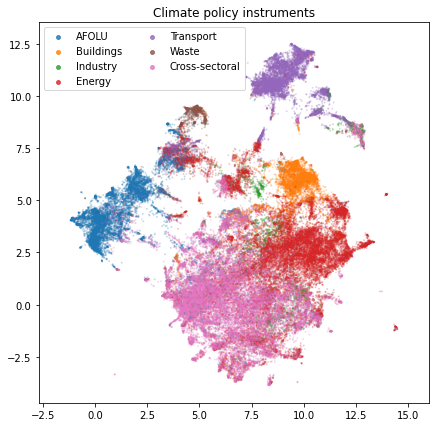

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(
    embedding_df["x"],
    embedding_df["y"],
    s=1,
    alpha=0.2,
    color=embedding_df["colour"]
)
for name, group in embedding_df.groupby("sector"):
    s = ax.scatter(
        [],
        [],
        s=15,
        alpha=0.8,
        label=name.split(".")[1].strip()
    )

ax.legend(ncol=2)

#ax.axis("off")

ax.set_title("Climate policy instruments")

ax.axis('equal')

plt.savefig("../figures/embeddings.png", dpi=200)

In [11]:
import textwrap


edf = df.merge(embedding_df[["id","x","y","instrument","sector"]], how='left')#.drop(columns=['id'])
#edf["title"] = edf["title"].apply(lambda x: "<br>".join(textwrap.wrap(x, 50)))

for c in instruments + sectors:
    edf[c] = edf[c].round().astype(bool)
    
#edf.head(1000).to_feather("../app/static/data.feather", compression="uncompressed")
edf.tail()

,idx,id,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,...,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante,x,y,instrument,sector
78396,78396,W1001986490,Carbon Neutrality as Leverage in Transitioning...,Climate change is one of the most pressing env...,2006,None,None,0.970215,True,False,...,0.930176,1.000000,0.160034,0.010002,0.850098,0.680176,6.267260,-1.662060,4 - 1. Economic instruments,8 - 15. Cross-sectoral
78397,78397,W100136754,Fiscal mechanisms to promote CO2 for enhanced ...,The use of carbon dioxide (CO2) for enhanced o...,2005,book-chapter,https://doi.org/10.1016/b978-008044704-9/50188-9,0.990234,True,False,...,0.970215,0.959961,0.990234,0.000000,0.080017,0.979980,6.496616,5.947799,4 - 1. Economic instruments,8 - 04. Energy
78398,78398,W1001294588,Experimental comparison between R152a and R134...,Abstract The EU Regulation 517/2014 has recent...,2015,journal-article,https://doi.org/10.1016/j.ijrefrig.2015.06.021,0.720215,False,True,...,0.020004,1.000000,0.010002,0.010002,0.930176,0.020004,6.757770,7.123181,4 - 2. Regulatory Instruments,8 - 02. Buildings
78399,78399,W1000733675,BRIEF COMMUNICATION: Genetic control of the ru...,Introduction Methane is a waste product genera...,2015,None,None,0.729980,False,False,...,0.140015,0.250000,1.000000,0.040009,0.049988,0.990234,1.946431,6.599224,"4 - 3. Information, education and training",8 - 01. AFOLU
78400,78400,W100066195,Cost Effective and Environmentally Safe Emissi...,The aim of this paper is to analyze robust cos...,2010,book-chapter,https://doi.org/10.1007/978-3-642-03735-1_5,0.990234,True,False,...,0.010002,0.189941,0.000000,0.000000,0.010002,0.990234,8.663224,-1.944785,4 - 1. Economic instruments,8 - 15. Cross-sectoral


In [12]:
notna = edf.drop(
        columns=["publication_year","abstract","doi","type"]
    ).dropna().idx

edf[~edf['idx'].isin(notna)].drop(
        columns=["publication_year","abstract","doi","type"]
    )

,idx,id,title,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training","4 - 4. Governance, strategies and targets",4 - 5. Agreements,5 - 1.02. Carbon pricing,...,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante,x,y,instrument,sector


In [13]:
# edf.to_feather(
#     "../app/static/data.feather", compression="lz4"
# )

In [15]:
import json

xmin = edf['x'].min()
xmax = edf['x'].max()
xdiff = xmax - xmin

ymin = edf['y'].min()
ymax = edf['y'].max()
ydiff = ymax - ymin

w_ratio = xdiff / ydiff
print(xdiff, ydiff)
dims = {'w_ratio': w_ratio}

print(dims)

with open('../app/dims.json', 'w') as fout:
    json.dump(dims, fout)



15.668704152107239 16.581682920455933
{'w_ratio': 0.944940524268354}


In [16]:
import gzip
import json
list_df = np.array_split(edf, 5)
for i, dfc in enumerate(list_df):
    with gzip.open(f"../app/assets/data_{i}.json","wt") as fout:
        json.dump(dfc.drop(
            columns=["publication_year","abstract","doi","type"]
        ).to_dict(orient='list'), fout)

In [17]:

with gzip.open("../app/assets/data.json","wt") as fout:
    json.dump(edf.drop(
        columns=["publication_year","abstract","doi","type"]
    ).to_dict(orient='list'), fout)

In [36]:
author_df

,work_id,author_id,position,exact_position,institutions,raw_affiliation,is_corresponding,id_orcid,author_name,institution_id,institution_name,institution_type,institution_country_code,pos
0,W100066195,A5071358280,first,None,[I1317774081],"Institute for Applied Systems Analysis, Laxenb...",False,None,T. Ermolieva,I1317774081,International Institute for Applied Systems An...,nonprofit,AT,1.0
1,W100066195,A5016497674,last,None,[I1317774081],"Institute for Applied Systems Analysis, Laxenb...",False,https://orcid.org/0000-0002-6107-0972,M. Makowski,I1317774081,International Institute for Applied Systems An...,nonprofit,AT,3.0
2,W100066195,A5015439686,middle,None,[I1317774081],"Institute for Applied Systems Analysis, Laxenb...",False,None,Y. Ermoliev,I1317774081,International Institute for Applied Systems An...,nonprofit,AT,2.0
3,W100066195,A5062073716,middle,None,[I1317774081],"Institute for Applied Systems Analysis, Laxenb...",False,None,G. Fischer,I1317774081,International Institute for Applied Systems An...,nonprofit,AT,2.0
4,W100066195,A5016531914,middle,None,[I1317774081],"Institute for Applied Systems Analysis, Laxenb...",False,https://orcid.org/0000-0003-1269-4145,M. Jonas,I1317774081,International Institute for Applied Systems An...,nonprofit,AT,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258122,W999485533,A5026311689,first,None,[I4210116113],Istituto Superiore per la protezione e la rice...,False,None,Rocío Dánica Cóndor,I4210116113,Istituto Superiore per la Protezione e la Rice...,government,IT,1.0
258123,W999485533,A5004847850,last,None,[I4210116113],Istituto Superiore per la protezione e la rice...,False,None,Marina Colaiezzi,I4210116113,Istituto Superiore per la Protezione e la Rice...,government,IT,3.0
258124,W999485533,A5085922139,middle,None,[I4210116113],Istituto Superiore per la protezione e la rice...,False,None,Marina Vitullo,I4210116113,Istituto Superiore per la Protezione e la Rice...,government,IT,2.0
258125,W999485533,A5006310038,middle,None,[I4210116113],Istituto Superiore per la protezione e la rice...,False,None,Domenico Gaudioso,I4210116113,Istituto Superiore per la Protezione e la Rice...,government,IT,2.0


In [43]:
author_df = pd.read_feather('../data/authors.feather')
first = author_df['position']=='first'
mid = author_df['position']=='middle'
last = author_df['position']=='last'
author_df.loc[first,"pos"] = 1
author_df.loc[mid,"pos"] = 2
author_df.loc[last,"pos"] = 3

def cc(x):
    return '; '.join(set(x.dropna()))

author_strings = author_df.sort_values('pos').groupby('work_id').agg({
    'author_name': cc,
    'institution_name': cc,
}).reset_index().rename(columns={'work_id': 'id'})

print(author_df.shape)
print(author_df.merge(edf, left_on='work_id', right_on='id').shape)

author_strings.head()



(258127, 14)
(240805, 58)


,id,author_name,institution_name
0,W100066195,G. Fischer; Y. Ermoliev; T. Ermolieva; M. Jona...,International Institute for Applied Systems An...
1,W1000733675,Pinares-Patino Cs; Wood Gr; Hickey Sm; Kirk Mr...,AgResearch
2,W1001294588,Rodrigo Llopis; R. Cabello; E. Torrella; Danie...,Universitat Politècnica de València; Jaume I U...
3,W100136754,David L. Coleman; Carl-W. Hustad; J. Michael A...,CO2-Norway (Norway)
4,W1001986490,Melanie Dubin; Magdalena Szpala; Tamara Connell,


In [44]:
all_df = edf.merge(author_strings, how='left')
all_df['author_name'] = all_df['author_name'].fillna("")
all_df['institution_name'] = all_df['institution_name'].fillna("")

all_df["text"] = all_df["title"] + ".\n " + all_df["abstract"] + " " + all_df["author_name"] + " " + all_df['institution_name']
all_df["text"] = all_df["text"].str.lower()
#edf["text"] = edf["text"].astype("string[pyarrow]")
all_df[["idx", "text"]].to_feather("../app/assets/texts.feather", compression="zstd")

In [45]:
all_df

,idx,id,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,...,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante,x,y,instrument,sector,author_name,institution_name,text
0,0,W999667810,Modelling Stand Dynamics after Selective Loggi...,Abstract: Forest degradation and biomass damag...,2012,None,None,0.870117,True,False,...,0.000000,0.080017,0.790039,-0.534156,4.186456,4 - 1. Economic instruments,8 - 01. AFOLU,,,modelling stand dynamics after selective loggi...
1,1,W999644455,"Mathematics, Politics, and Greenhouse Gas Inte...",While reading the newspaper one morning in spr...,2003,journal-article,https://doi.org/10.5951/mt.96.9.0646,0.979980,False,False,...,0.010002,0.959961,0.029999,4.850356,0.739530,"4 - 4. Governance, strategies and targets",8 - 15. Cross-sectoral,Stan Yoshinobu,"California State University, Dominguez Hills","mathematics, politics, and greenhouse gas inte..."
2,2,W999485533,The Contribution of Rural Development Programm...,"The Health Check reform, reinforcing the Commo...",2012,book-chapter,https://doi.org/10.1007/978-3-642-22266-5_23,0.990234,False,False,...,0.010002,0.970215,0.189941,1.896255,5.876104,"4 - 4. Governance, strategies and targets",8 - 01. AFOLU,Rocío Dánica Cóndor; Marina Vitullo; Domenico ...,Istituto Superiore per la Protezione e la Rice...,the contribution of rural development programm...
3,3,W998914803,Negotiating greenhouse abatement and the theor...,The initial qualified commitment of Annex 1 co...,1999,book-chapter,https://doi.org/10.1007/978-94-015-9169-0_3,0.990234,True,False,...,0.000000,0.260010,0.990234,8.374671,-3.690836,4 - 5. Agreements,8 - 15. Cross-sectoral,Mike Hinchy; Brian S. Fisher,Australian Bureau of Agricultural and Resource...,negotiating greenhouse abatement and the theor...
4,4,W998247206,Is the introduction of a carbon tax a ‘teachab...,With the arrival of the carbon tax earlier thi...,2012,None,None,0.990234,True,False,...,0.010002,0.010002,0.990234,8.496017,4.127941,4 - 1. Economic instruments,8 - 15. Cross-sectoral,Liam Smith; Bas Verplanken; Jim Curtis,,is the introduction of a carbon tax a ‘teachab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78396,78396,W1001986490,Carbon Neutrality as Leverage in Transitioning...,Climate change is one of the most pressing env...,2006,None,None,0.970215,True,False,...,0.010002,0.850098,0.680176,6.267260,-1.662060,4 - 1. Economic instruments,8 - 15. Cross-sectoral,Melanie Dubin; Magdalena Szpala; Tamara Connell,,carbon neutrality as leverage in transitioning...
78397,78397,W100136754,Fiscal mechanisms to promote CO2 for enhanced ...,The use of carbon dioxide (CO2) for enhanced o...,2005,book-chapter,https://doi.org/10.1016/b978-008044704-9/50188-9,0.990234,True,False,...,0.000000,0.080017,0.979980,6.496616,5.947799,4 - 1. Economic instruments,8 - 04. Energy,David L. Coleman; Carl-W. Hustad; J. Michael A...,CO2-Norway (Norway),fiscal mechanisms to promote co2 for enhanced ...
78398,78398,W1001294588,Experimental comparison between R152a and R134...,Abstract The EU Regulation 517/2014 has recent...,2015,journal-article,https://doi.org/10.1016/j.ijrefrig.2015.06.021,0.720215,False,True,...,0.010002,0.930176,0.020004,6.757770,7.123181,4 - 2. Regulatory Instruments,8 - 02. Buildings,Rodrigo Llopis; R. Cabello; E. Torrella; Danie...,Universitat Politècnica de València; Jaume I U...,experimental comparison between r152a and r134...
78399,78399,W1000733675,BRIEF COMMUNICATION: Genetic control of the ru...,Introduction Methane is a waste product genera...,2015,None,None,0.729980,False,False,...,0.040009,0.049988,0.990234,1.946431,6.599224,"4 - 3. Information, education and training",8 - 01. AFOLU,Pinares-Patino Cs; Wood Gr; Hickey Sm; Kirk Mr...,AgResearch,brief communication: genetic control of the ru...


In [46]:
import sqlite3
with sqlite3.connect("../app/data/data.db") as con:
    cur = con.cursor()
    cur.execute('DROP TABLE data')
    df.merge(author_strings, how='left').to_sql(name='data', con=con, index=False)

In [47]:
d = [0,1,2,3,4,5,6,7,8,9]
with sqlite3.connect("../app/data/data.db") as con:
    test = pd.read_sql('SELECT * FROM data WHERE idx IN (%s)' % ("?," * len(d))[:-1], params=d, con=con)
    
test

,idx,id,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,...,8 - 15. Cross-sectoral,10 - 3. Quantitative,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante,author_name,institution_name
0,0,W999667810,Modelling Stand Dynamics after Selective Loggi...,Abstract: Forest degradation and biomass damag...,2012,None,None,0.870117,0.970215,0.000000,...,0.029999,0.990234,0.000000,1.000000,0.449951,0.000000,0.080017,0.790039,None,None
1,1,W999644455,"Mathematics, Politics, and Greenhouse Gas Inte...",While reading the newspaper one morning in spr...,2003,journal-article,https://doi.org/10.5951/mt.96.9.0646,0.979980,0.010002,0.059998,...,0.939941,0.640137,0.239990,0.010002,0.779785,0.010002,0.959961,0.029999,Stan Yoshinobu,"California State University, Dominguez Hills"
2,2,W999485533,The Contribution of Rural Development Programm...,"The Health Check reform, reinforcing the Commo...",2012,book-chapter,https://doi.org/10.1007/978-3-642-22266-5_23,0.990234,0.290039,0.439941,...,0.049988,0.620117,0.239990,0.010002,1.000000,0.010002,0.970215,0.189941,Rocío Dánica Cóndor; Marina Vitullo; Domenico ...,Istituto Superiore per la Protezione e la Rice...
3,3,W998914803,Negotiating greenhouse abatement and the theor...,The initial qualified commitment of Annex 1 co...,1999,book-chapter,https://doi.org/10.1007/978-94-015-9169-0_3,0.990234,0.939941,0.010002,...,0.979980,0.529785,0.320068,1.000000,0.010002,0.000000,0.260010,0.990234,Mike Hinchy; Brian S. Fisher,Australian Bureau of Agricultural and Resource...
4,4,W998247206,Is the introduction of a carbon tax a ‘teachab...,With the arrival of the carbon tax earlier thi...,2012,None,None,0.990234,0.979980,0.010002,...,0.589844,0.439941,0.439941,0.010002,0.010002,0.010002,0.010002,0.990234,Liam Smith; Bas Verplanken; Jim Curtis,
5,5,W998203098,Powerful – development of engine and vehicle t...,The EU funded project “Powerful” supported the...,2014,journal-article,https://doi.org/10.19206/ce-116941,0.979980,0.310059,0.939941,...,0.049988,0.360107,0.540039,1.000000,0.010002,0.020004,0.870117,0.020004,C. B. Klüting; Michael Frambourg; Torben Menze...,
6,6,W998175845,The Dark Side of the Sun A Critical Discourse ...,This thesis is a critical investigation of the...,2015,None,None,0.990234,0.330078,0.000000,...,0.029999,0.010002,0.990234,0.830078,1.000000,0.000000,0.979980,0.010002,Ann-Kathrin Görisch,
7,7,W99804989,California Dreaming,This chapter outlines the challenges facing Ca...,2010,book-chapter,https://doi.org/10.1016/b978-1-85617-655-2.000...,0.990234,0.990234,0.010002,...,0.130005,0.970215,0.010002,0.990234,0.010002,0.990234,0.990234,0.119995,Frank Harris; Gary A. Stern,Edison International (United States)
8,8,W997892983,Non-market value evaluation on integrated exte...,Externality is a ubiquitous economic phenomeno...,2013,journal-article,None,0.990234,0.990234,0.059998,...,0.040009,0.970215,0.010002,0.219971,0.429932,0.109985,0.020004,0.990234,Liu WenCun; Qinqin Liu; Qiong Ma; Yapeng Wang,
9,9,W997803915,The Potential Evolution of the European Energy...,This paper assesses the impact of decarbonisat...,2014,None,None,0.990234,0.070007,0.010002,...,0.040009,0.919922,0.029999,0.990234,0.000000,0.010002,0.010002,1.000000,Arno Behrens; Caroline Coulie; Jonas Teusch,


In [206]:
d = list(df.idx.values)
def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

download_df = pd.DataFrame()
for batch_ids in batch(d,30000):
    #x = list(x)
    #print(batch_ids)
    q = f'SELECT * FROM data WHERE idx IN ({",".join([str(x) for x in batch_ids])})'
    with sqlite3.connect("../app/data/data.db") as con:
        batch_df = pd.read_sql(q, con=con)
        #batch_df = pd.read_sql('SELECT * FROM data WHERE idx IN (%s)' % ("?," * len(batch_ids))[:-1], params=batch_ids, con=con)
        print(batch_df.shape)
        download_df = pd.concat([download_df, batch_df])
    break
download_df

(30000, 40)


,index,idx,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,...,8 - 05. Transport,8 - 06. Waste,8 - 15. Cross-sectoral,10 - 3. Quantitative,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante
0,0,0,Modelling Stand Dynamics after Selective Loggi...,Abstract: Forest degradation and biomass damag...,2012,None,None,0.870117,0.970215,0.000000,...,0.020004,0.010002,0.029999,0.990234,0.000000,1.000000,0.449951,0.000000,0.080017,0.790039
1,1,1,"Mathematics, Politics, and Greenhouse Gas Inte...",While reading the newspaper one morning in spr...,2003,journal-article,https://doi.org/10.5951/mt.96.9.0646,0.979980,0.010002,0.059998,...,0.010002,0.010002,0.939941,0.640137,0.239990,0.010002,0.779785,0.010002,0.959961,0.029999
2,2,2,The Contribution of Rural Development Programm...,"The Health Check reform, reinforcing the Commo...",2012,book-chapter,https://doi.org/10.1007/978-3-642-22266-5_23,0.990234,0.290039,0.439941,...,0.010002,0.020004,0.049988,0.620117,0.239990,0.010002,1.000000,0.010002,0.970215,0.189941
3,3,3,Negotiating greenhouse abatement and the theor...,The initial qualified commitment of Annex 1 co...,1999,book-chapter,https://doi.org/10.1007/978-94-015-9169-0_3,0.990234,0.939941,0.010002,...,0.010002,0.010002,0.979980,0.529785,0.320068,1.000000,0.010002,0.000000,0.260010,0.990234
4,4,4,Is the introduction of a carbon tax a ‘teachab...,With the arrival of the carbon tax earlier thi...,2012,None,None,0.990234,0.979980,0.010002,...,0.000000,0.010002,0.589844,0.439941,0.439941,0.010002,0.010002,0.010002,0.010002,0.990234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29995,Study on Closed-Loop Supply Chain Strategy Bas...,Considering the environmental awareness of con...,2020,proceedings-article,https://doi.org/10.1145/3396743.3396757,0.990234,0.990234,0.020004,...,0.029999,0.709961,0.199951,0.979980,0.000000,0.010002,0.000000,0.010002,0.010002,0.990234
29996,29996,29996,"Climate, capital, class and crisis",The extent of the environmental crisis – most ...,2020,journal-article,https://doi.org/10.3828/ts.2020.6,0.990234,0.970215,0.010002,...,0.010002,0.010002,0.979980,0.020004,0.979980,0.029999,0.000000,0.010002,0.199951,0.919922
29997,29997,29997,Impacts of financing mechanism and power struc...,• Financing mechanism of supply chain is analy...,2020,journal-article,https://doi.org/10.1016/j.tre.2020.101957,0.990234,0.990234,0.029999,...,0.010002,0.000000,0.059998,0.899902,0.029999,0.010002,0.000000,0.010002,0.010002,0.990234
29998,29998,29998,Carbon dioxide sequestration on mortars contai...,Abstract The world is closer to exceeding the ...,2020,book-chapter,https://doi.org/10.1016/b978-0-12-819946-6.000...,0.979980,0.040009,0.020004,...,0.010002,0.180054,0.340088,0.280029,0.629883,1.000000,0.010002,0.010002,0.239990,0.540039


In [182]:
print(batch_ids)
q = 'SELECT * FROM data WHERE idx IN (%s)' % ("?," * len(batch_ids))[:-1]
print(q)
with sqlite3.connect("../app/data/data.db") as con:
    batch_df = pd.read_sql(q, params=batch_ids, con=con)
batch_df

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
SELECT * FROM data WHERE idx IN (?,?,?,?,?,?,?,?,?,?)


,index,idx,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,...,8 - 05. Transport,8 - 06. Waste,8 - 15. Cross-sectoral,10 - 3. Quantitative,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante


In [173]:
list(batch_ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [174]:
y

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [183]:
batch_ids == y

True

In [188]:
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
with sqlite3.connect("../app/data/data.db") as con:
    batch_df = pd.read_sql('SELECT * FROM data WHERE idx IN (%s)' % ("?," * len(y))[:-1], params=batch_ids, con=con)
batch_df

DatabaseError: Execution failed on sql 'SELECT * FROM data WHERE idx IN ?': near "?": syntax error

In [199]:
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
q = f'SELECT * FROM data WHERE idx IN ({",".join([str(x) for x in y])})'
print(q)
with sqlite3.connect("../app/data/data.db") as con:
    batch_df = pd.read_sql(q, con=con)
batch_df

SELECT * FROM data WHERE idx IN (0,1,2,3,4,5,6,7,8,9)


,index,idx,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,...,8 - 05. Transport,8 - 06. Waste,8 - 15. Cross-sectoral,10 - 3. Quantitative,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante
0,0,0,Modelling Stand Dynamics after Selective Loggi...,Abstract: Forest degradation and biomass damag...,2012,None,None,0.870117,0.970215,0.000000,...,0.020004,0.010002,0.029999,0.990234,0.000000,1.000000,0.449951,0.000000,0.080017,0.790039
1,1,1,"Mathematics, Politics, and Greenhouse Gas Inte...",While reading the newspaper one morning in spr...,2003,journal-article,https://doi.org/10.5951/mt.96.9.0646,0.979980,0.010002,0.059998,...,0.010002,0.010002,0.939941,0.640137,0.239990,0.010002,0.779785,0.010002,0.959961,0.029999
2,2,2,The Contribution of Rural Development Programm...,"The Health Check reform, reinforcing the Commo...",2012,book-chapter,https://doi.org/10.1007/978-3-642-22266-5_23,0.990234,0.290039,0.439941,...,0.010002,0.020004,0.049988,0.620117,0.239990,0.010002,1.000000,0.010002,0.970215,0.189941
3,3,3,Negotiating greenhouse abatement and the theor...,The initial qualified commitment of Annex 1 co...,1999,book-chapter,https://doi.org/10.1007/978-94-015-9169-0_3,0.990234,0.939941,0.010002,...,0.010002,0.010002,0.979980,0.529785,0.320068,1.000000,0.010002,0.000000,0.260010,0.990234
4,4,4,Is the introduction of a carbon tax a ‘teachab...,With the arrival of the carbon tax earlier thi...,2012,None,None,0.990234,0.979980,0.010002,...,0.000000,0.010002,0.589844,0.439941,0.439941,0.010002,0.010002,0.010002,0.010002,0.990234
5,5,5,Powerful – development of engine and vehicle t...,The EU funded project “Powerful” supported the...,2014,journal-article,https://doi.org/10.19206/ce-116941,0.979980,0.310059,0.939941,...,0.919922,0.010002,0.049988,0.360107,0.540039,1.000000,0.010002,0.020004,0.870117,0.020004
6,6,6,The Dark Side of the Sun A Critical Discourse ...,This thesis is a critical investigation of the...,2015,None,None,0.990234,0.330078,0.000000,...,0.010002,0.000000,0.029999,0.010002,0.990234,0.830078,1.000000,0.000000,0.979980,0.010002
7,7,7,California Dreaming,This chapter outlines the challenges facing Ca...,2010,book-chapter,https://doi.org/10.1016/b978-1-85617-655-2.000...,0.990234,0.990234,0.010002,...,0.029999,0.020004,0.130005,0.970215,0.010002,0.990234,0.010002,0.990234,0.990234,0.119995
8,8,8,Non-market value evaluation on integrated exte...,Externality is a ubiquitous economic phenomeno...,2013,journal-article,None,0.990234,0.990234,0.059998,...,0.020004,0.010002,0.040009,0.970215,0.010002,0.219971,0.429932,0.109985,0.020004,0.990234
9,9,9,The Potential Evolution of the European Energy...,This paper assesses the impact of decarbonisat...,2014,None,None,0.990234,0.070007,0.010002,...,0.010002,0.010002,0.040009,0.919922,0.029999,0.990234,0.000000,0.010002,0.010002,1.000000


In [193]:
("?," * len(y))[:-1]

'?,?,?,?,?,?,?,?,?,?'

In [62]:
df[df['title'].str.contains('Expected Health')]

,idx,id,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,...,8 - 05. Transport,8 - 06. Waste,8 - 15. Cross-sectoral,10 - 3. Quantitative,10 - 4. Qualitative,17 - 0. Supranational and international,17 - 1. National,17 - 2. Sub-national,19 - 0. Ex-post,19 - 1. Ex-ante
10219,10219,W4230428440,Expected Health Effects of Reduced Air<br>Poll...,The COVID-19 pandemic resulted in stay-at-home...,2021,journal-article,https://doi.org/10.3390/atmos12080951,0.75,0.029999,0.970215,...,0.97998,0.059998,0.029999,0.990234,0.0,0.0,0.990234,0.219971,0.779785,0.020004


In [15]:
edf["text2"] = edf["text"].astype("string[pyarrow]")

edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79971 entries, 0 to 79970
Data columns (total 45 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   idx                                                                                          79971 non-null  int64  
 1   title                                                                                        79971 non-null  object 
 2   abstract                                                                                     79971 non-null  string 
 3   publication_year                                                                             79969 non-null  Int16  
 4   type                                                                                         66719 non-null  object 
 5   doi                             

In [212]:
import pyarrow as pa
# texts = pd.read_feather("../app/static/texts.feather")
# texts["text"] = texts["text"].astype("string[pyarrow]")
# texts.head()
texts = edf['text']
x = pa.array(edf["text"])

In [218]:
%%timeit

z = pa.compute.match_substring_regex(x, "\bgermany")
ftexts = texts[np.array(z)]

15.7 ms ± 383 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [237]:

z = pa.compute.match_substring_regex(x, "\bgermany")
ftexts = texts[np.array(z)]
z.sum()

<pyarrow.UInt64Scalar: 0>

In [243]:
with sqlite3.connect("../app/data/data.db") as con:
    cur = con.cursor()
    cur.execute('CREATE INDEX text_idx ON data(abstract COLLATE NOCASE)')

In [244]:
q = 'SELECT * FROM data WHERE abstract LIKE "%germany%";'
with sqlite3.connect("../app/data/data.db") as con:
    matches = pd.read_sql(q, con=con)
    
matches.shape

(1705, 40)

In [246]:
idx = list(df['idx'].values)

In [251]:
%%timeit
q = f'SELECT * FROM data WHERE idx in ({",".join([str(x) for x in idx])})'
with sqlite3.connect("../app/data/data.db") as con:
    matches = pd.read_sql(q, con=con)

1.4 s ± 37.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [252]:
with sqlite3.connect("../app/data/data.db") as con:
    cur = con.cursor()
    cur.execute('CREATE INDEX idx_idx ON data(idx)')

In [253]:
%%timeit
q = f'SELECT * FROM data WHERE idx in ({",".join([str(x) for x in idx])})'
with sqlite3.connect("../app/data/data.db") as con:
    matches = pd.read_sql(q, con=con)

1.3 s ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [245]:
%%timeit
q = 'SELECT * FROM data WHERE abstract LIKE "%germany%";'
with sqlite3.connect("../app/data/data.db") as con:
    matches = pd.read_sql(q, con=con)

194 ms ± 26.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
search_string = "germany"
edf[edf["text"].str.contains(fr"\b{search_string.lower()}")]

2.43 s ± 64.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%%timeit
search_string = "germany"
edf[edf["text2"].str.contains(fr"\b{search_string.lower()}")]

234 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
cdict = {'8 - 01. AFOLU': '#3366CC', '8 - 02. Buildings': '#DC3912', '8 - 03. Industry': '#FF9900', '8 - 04. Energy': '#109618', '8 - 05. Transport': '#990099', '8 - 06. Waste': '#0099C6', '8 - 15. Cross-sectoral': '#DD4477'}
cdict.values()

dict_values(['#3366CC', '#DC3912', '#FF9900', '#109618', '#990099', '#0099C6', '#DD4477'])

In [105]:
category = schema[1]
for i, k in zip(category["levels"], category["colours"]):
    print(i, k)

8 - 01. AFOLU #3366CC
8 - 02. Buildings #DC3912
8 - 03. Industry #FF9900
8 - 04. Energy #109618
8 - 05. Transport #990099
8 - 06. Waste #0099C6
8 - 15. Cross-sectoral #DD4477


In [99]:
schema = [
    {"name": "Instruments", "levels": instruments},
    {"name": "Sectors", "levels": sectors, "colours": list(cdict.values())}
]

In [100]:
with open("../app/static/schema.json", "w") as fout:
    json.dump(schema, fout)

In [95]:
with open("../app/static/schema.json","r") as f:
    x = json.load(f)
    
x

[{'name': 'Instruments',
  'levels': ['4 - 1. Economic instruments',
   '4 - 2. Regulatory Instruments',
   '4 - 3. Information, education and training',
   '4 - 4. Governance, strategies and targets',
   '4 - 5. Agreements']},
 {'name': 'Sectors',
  'levels': ['8 - 01. AFOLU',
   '8 - 02. Buildings',
   '8 - 03. Industry',
   '8 - 04. Energy',
   '8 - 05. Transport',
   '8 - 06. Waste',
   '8 - 15. Cross-sectoral']}]

In [72]:
s = edf[["abstract"]].to_dict(orient="list")["abstract"][0]
type(s)

str

In [38]:
import json
import gzip
with gzip.open("../app/static/data.json","wt") as fout:
    json.dump(edf.to_dict(orient='list'), fout)

TypeError: Object of type NAType is not JSON serializable

In [33]:
print(edf.x.min(), edf.x.max(), edf.y.min(), edf.y.max())


-6.139839172363281 11.763970375061035 -2.224938154220581 17.703079223632812


In [45]:
edf.drop(columns=[
    "17 - 0. Supranational and international",
    "17 - 1. National",
    "17 - 2. Sub-national",
    "INCLUDE",
]).to_feather("../app/static/data.feather", compression="uncompressed")

In [57]:
import pyarrow as pa

data = [
    pa.array([1, 2, 3, 4]),
    pa.array(['foo', 'bar', 'baz', None]),
    pa.array([True, None, False, True])
]

batch = pa.record_batch(data, names=["f0","f1","f2"])


In [61]:
np.arange(df.shape[0]//10)

array([   0,    1,    2, ..., 8418, 8419, 8420])

In [68]:
for k, g in edf.groupby(np.arange(len(edf))//10000):
    print(k)

0
1
2
3
4
5
6
7
8


In [72]:
batch = pa.record_batch(edf.head())
with pa.OSFile('../app/static/data.arrow','wb') as sink:
    with pa.ipc.new_file(sink, batch.schema) as writer:
        for k, g in edf.groupby(np.arange(len(edf))//10000):
            batch = pa.record_batch(g)
            writer.write(batch)

In [59]:
with pa.OSFile('../app/static/data.arrow','wb') as sink:
    with pa.ipc.new_file(sink, batch.schema) as writer:
        for i in range(2):
            writer.write(batch)

In [54]:
with pa.OSFile('../app/static/data.arrow', 'rb') as source:
    loaded_array = pa.ipc.open_file(source).read_all()

(168420, 27)

In [39]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84210 entries, 0 to 84209
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          84210 non-null  object 
 1   title                                       84210 non-null  object 
 2   abstract                                    84210 non-null  string 
 3   publication_year                            84208 non-null  Int16  
 4   type                                        70732 non-null  object 
 5   doi                                         56189 non-null  object 
 6   INCLUDE                                     84210 non-null  float16
 7   4 - 1. Economic instruments                 84210 non-null  bool   
 8   4 - 2. Regulatory Instruments               84210 non-null  bool   
 9   4 - 3. Information, education and training  84210 non-null  bool   
 10  4 - 4. Gov

In [23]:
for c in edf.select_dtypes(np.float16).columns:
    edf[c] = edf[c].round(2).astype(np.float32)
edf.head(100).to_parquet("/home/max/software/interactives/duckdbwasm-vitebrowser/data.parquet")

In [46]:
args = ["a","b"]
def f(*x):
    print(x[0])
    print(x)
    
f(14,2)


14
(14, 2)


In [50]:
conditions = [
    (df[instruments[0]]>0.5),
    (df[instruments[4]]>0.5),
]
conditions[0] + conditions[1]

0         True
1        False
2        False
3         True
4         True
         ...  
84205     True
84206     True
84207    False
84208    False
84209     True
Length: 84210, dtype: bool

In [70]:
a = "german"
df[df["abstract"].str.contains(fr"\b{a}")]

,id,title,abstract,publication_year,type,doi,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training","4 - 4. Governance, strategies and targets",4 - 5. Agreements,8 - 01. AFOLU,8 - 02. Buildings,8 - 03. Industry,8 - 04. Energy,8 - 05. Transport,8 - 06. Waste,8 - 15. Cross-sectoral
14514,W3213535908,Using Renewable Energy Policies to Develop Car...,Despite recent efforts to reduce carbon dioxid...,2021.0,book-chapter,https://doi.org/10.1007/978-3-030-72372-9_8,0.992803,0.990213,0.007689,0.010338,0.030201,0.007670,0.020733,0.011995,0.009325,0.961161,0.008641,0.005229,0.058756
23290,W3125595291,Scientific Shortcomings in the EPA's Endangerm...,"On April 24, 2009, the U.S. Environmental Prot...",2009.0,posted-content,None,0.994913,0.033176,0.064133,0.019617,0.565104,0.997258,0.009217,0.007471,0.020265,0.046765,0.009199,0.010558,0.984640
26074,W3122606480,Sustainable Development: 2015 Climate Change A...,Nigeria’s per capital emission figures and agg...,2019.0,posted-content,None,0.990500,0.019628,0.009911,0.034332,0.991407,0.652000,0.333282,0.006671,0.004093,0.009684,0.006056,0.008203,0.870222
34375,W2988115128,Review on carbon emissions of commercial build...,Abstract The building sector accounts for one-...,2020.0,journal-article,https://doi.org/10.1016/j.rser.2019.109545,0.993704,0.636165,0.019078,0.685019,0.015959,0.004416,0.031815,0.976159,0.013440,0.072901,0.023818,0.029989,0.025839
40172,W2893899067,DISPLAYING THE PRINCIPLE OF EQUITY OF ECOLOGIC...,The article was analyzed international and nat...,2018.0,journal-article,https://doi.org/10.15407/econlaw.2018.02.064,0.992437,0.015078,0.218382,0.008618,0.616884,0.988919,0.006868,0.005508,0.082163,0.887532,0.004534,0.004909,0.395512
40735,W2886519027,City of the Future Constance: “Future City” – ...,"Today, more than half of the world's populatio...",2018.0,None,None,0.992947,0.016025,0.067177,0.028574,0.938321,0.006224,0.020176,0.963480,0.009140,0.047563,0.034904,0.026747,0.045759
47307,W2605567633,SPATIAL PLANNING STRATEGIES FOR LOW CARBON CIT...,The preparation of Nigeria’s Intended National...,2016.0,None,None,0.993648,0.029114,0.053103,0.021782,0.994056,0.042896,0.025970,0.045681,0.011248,0.032328,0.529002,0.042503,0.826379
51374,W2498913509,"Erdgas, Klima und Umwelt",The global climate is affected by human activi...,1997.0,None,None,0.994750,0.136376,0.029633,0.047200,0.996403,0.949588,0.014511,0.010496,0.147693,0.986611,0.015769,0.010234,0.069007
56653,W2313177304,A Ten Step Protocol and Plan for CCS Site Char...,This report expresses a Ten-Step Protocol for ...,2013.0,report,https://doi.org/10.2172/1158546,0.903172,0.057600,0.097736,0.271395,0.088988,0.028743,0.040210,0.003828,0.009048,0.051106,0.005060,0.004685,0.895067
62643,W2160928333,Climate Change Policies in Germany: Make Ambit...,Germany reduced greenhouse gas emissions subst...,2012.0,report-series,None,0.992919,0.962920,0.012325,0.011040,0.897344,0.019367,0.012876,0.009330,0.023679,0.974544,0.009893,0.005566,0.070964
